In [1]:
#import modules need for analysis
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

In [28]:
csv_file_name = '/Users/colbyagostino/projects/eOD/NNK/A138Q/output.csv'
#Generating heatmaps

# adjust UNBOUND_CUTOFF based on pdb
UNBOUND_CUTOFF = -600
RATIO_CUTOFF = 1.001

#load the data into a pandas dataframe
df = pd.read_csv(csv_file_name, names='Position Amino.Acid Native Bound Unbound Binding WT_Binding WT Ratio'.split(), index_col=False )
#Add wildtype AA to position (for display)
df['Position_WT_aa'] = df.Position + ' (' + df.WT  + ')' 

#filter values
df = df.query(f'Unbound<{UNBOUND_CUTOFF} and Ratio>{RATIO_CUTOFF}')

# convert from tidy format (https://en.wikipedia.org/wiki/Tidy_data) to a wider format
df = pd.pivot_table(df, values='Ratio', 
                     index=['Position_WT_aa'], 
                     columns='Amino.Acid')

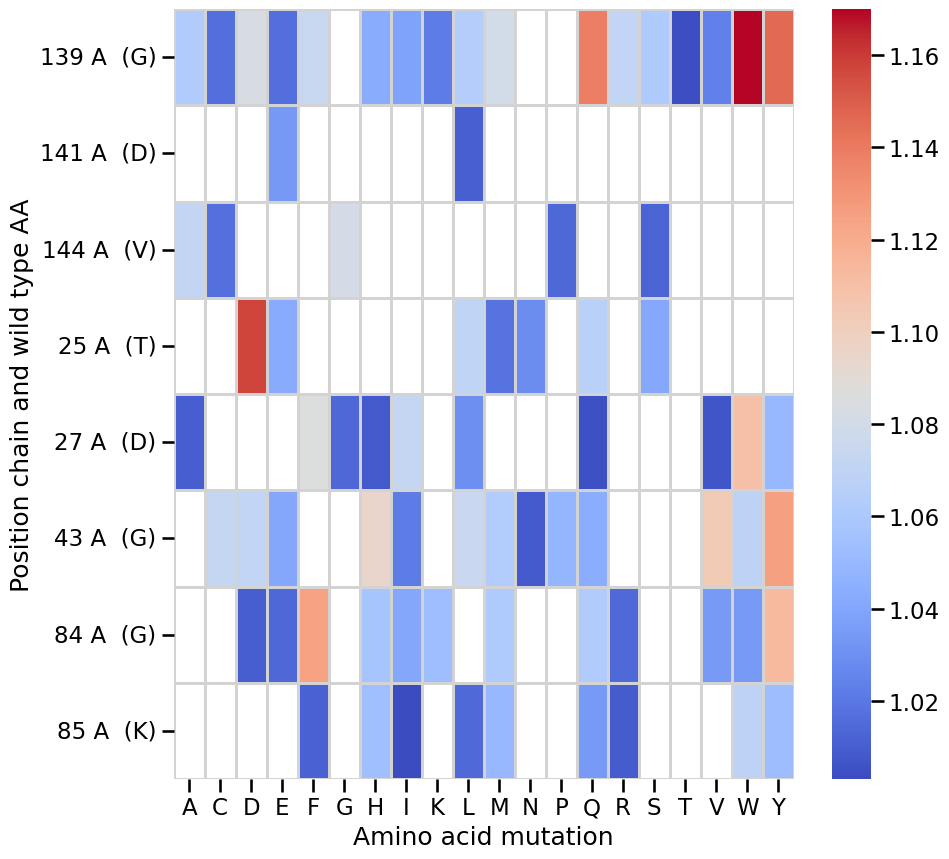

In [29]:
#plot the heatmap
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df, cmap='coolwarm', linewidths= 1, linecolor='lightgray')
plt.xlabel('Amino acid mutation');
plt.ylabel('Position chain and wild type AA');
sns.set_context("talk") #make labels bigger

In [30]:
f.savefig('output.png')